In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

In [30]:
df = pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


from this i observerd that there is no null values and all the data types are correct in from respectivelty

In [32]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

from this came to know that i only two values present in the 'SEX' coulmn

assigning the 0 value to female and 1 value for male    >>>>>>>>>>>>>>>>>>

In [33]:
df['sex'] = df['sex'].apply(lambda x : 0 if x == "female" else 1)

* i found that only two unique values in the smoker column

* so assigning the 0 value to 'NO' and 1 value for 'YES' >>>>>>>>>>>>>>>>>>

In [34]:
df['smoker'] = df['smoker'].apply(lambda x : 0 if  x == 'no' else 1)

In [35]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


in the "region" column four diffrent unique values  i found.

In [36]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

to encode the four unique values i use the label encoder  >>>>>>>>>>>>

In [37]:
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

In [38]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


* the column "age", "bmi", "charges" contains the continues data

* rest of alll the columns having the categorical data

* the columns having continues data are distributed normally 



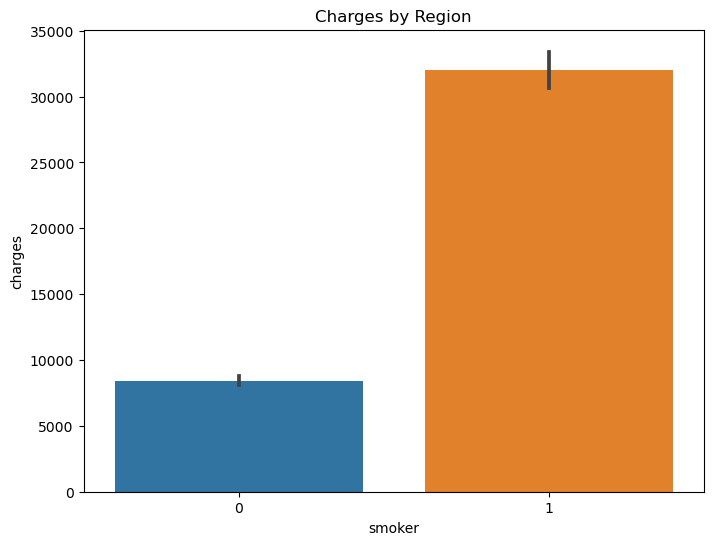

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x="smoker", y="charges", data=df)
plt.title("Charges by Region")
plt.show()

* i observed that charges are more for the non smoker compared to smoker

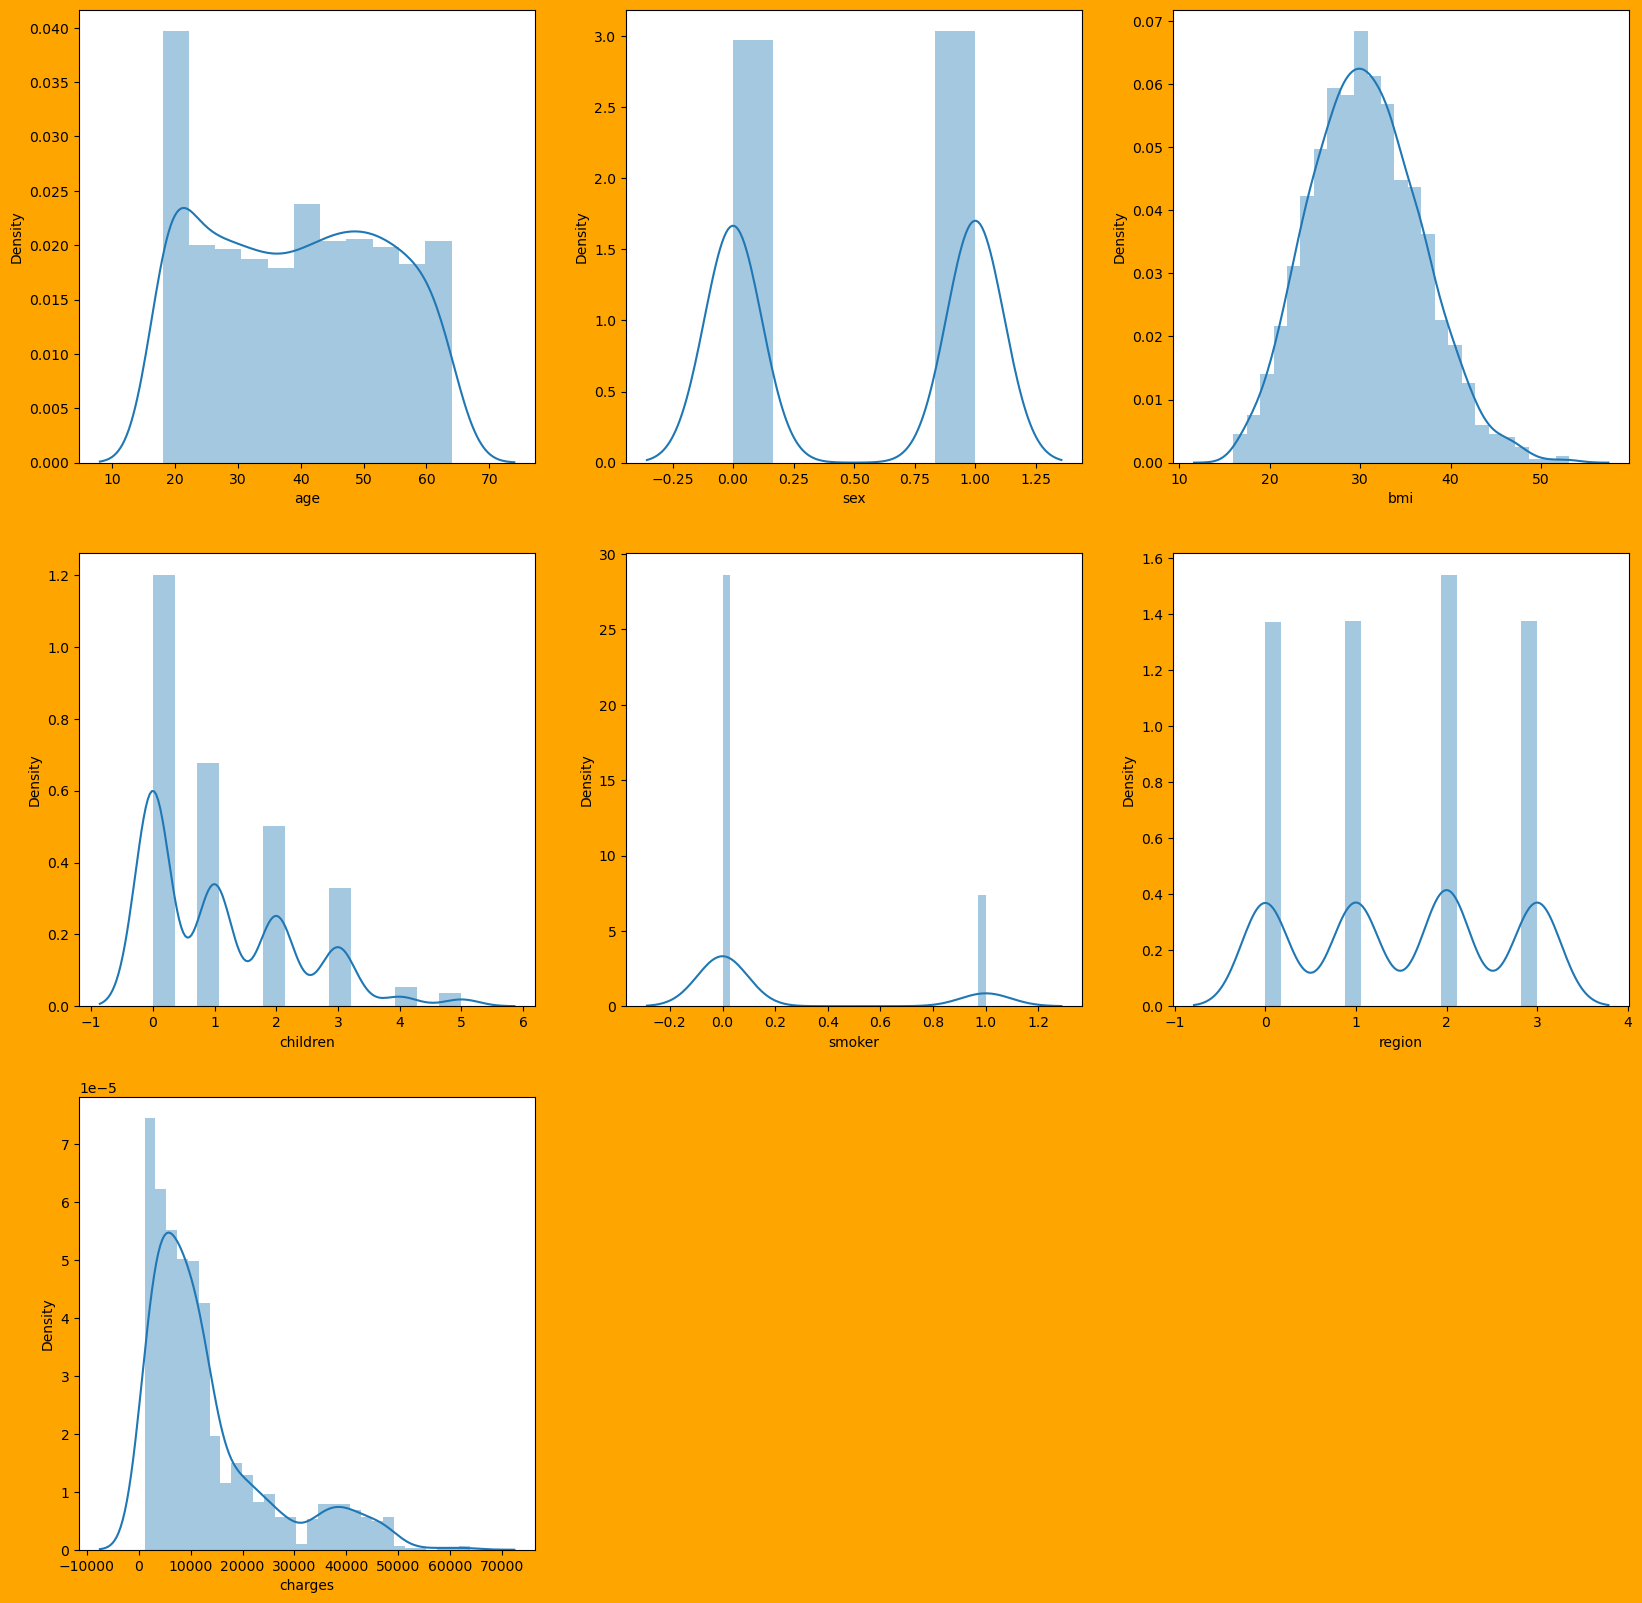

In [40]:
plt.figure(figsize=(20, 20), facecolor="orange")
plots = 1

for i in df.columns:  
    if plots <= 7:
        ax = plt.subplot(3, 3, plots)
        sns.distplot(df[i])
        plt.xlabel(i)
        plots += 1

plt.show()


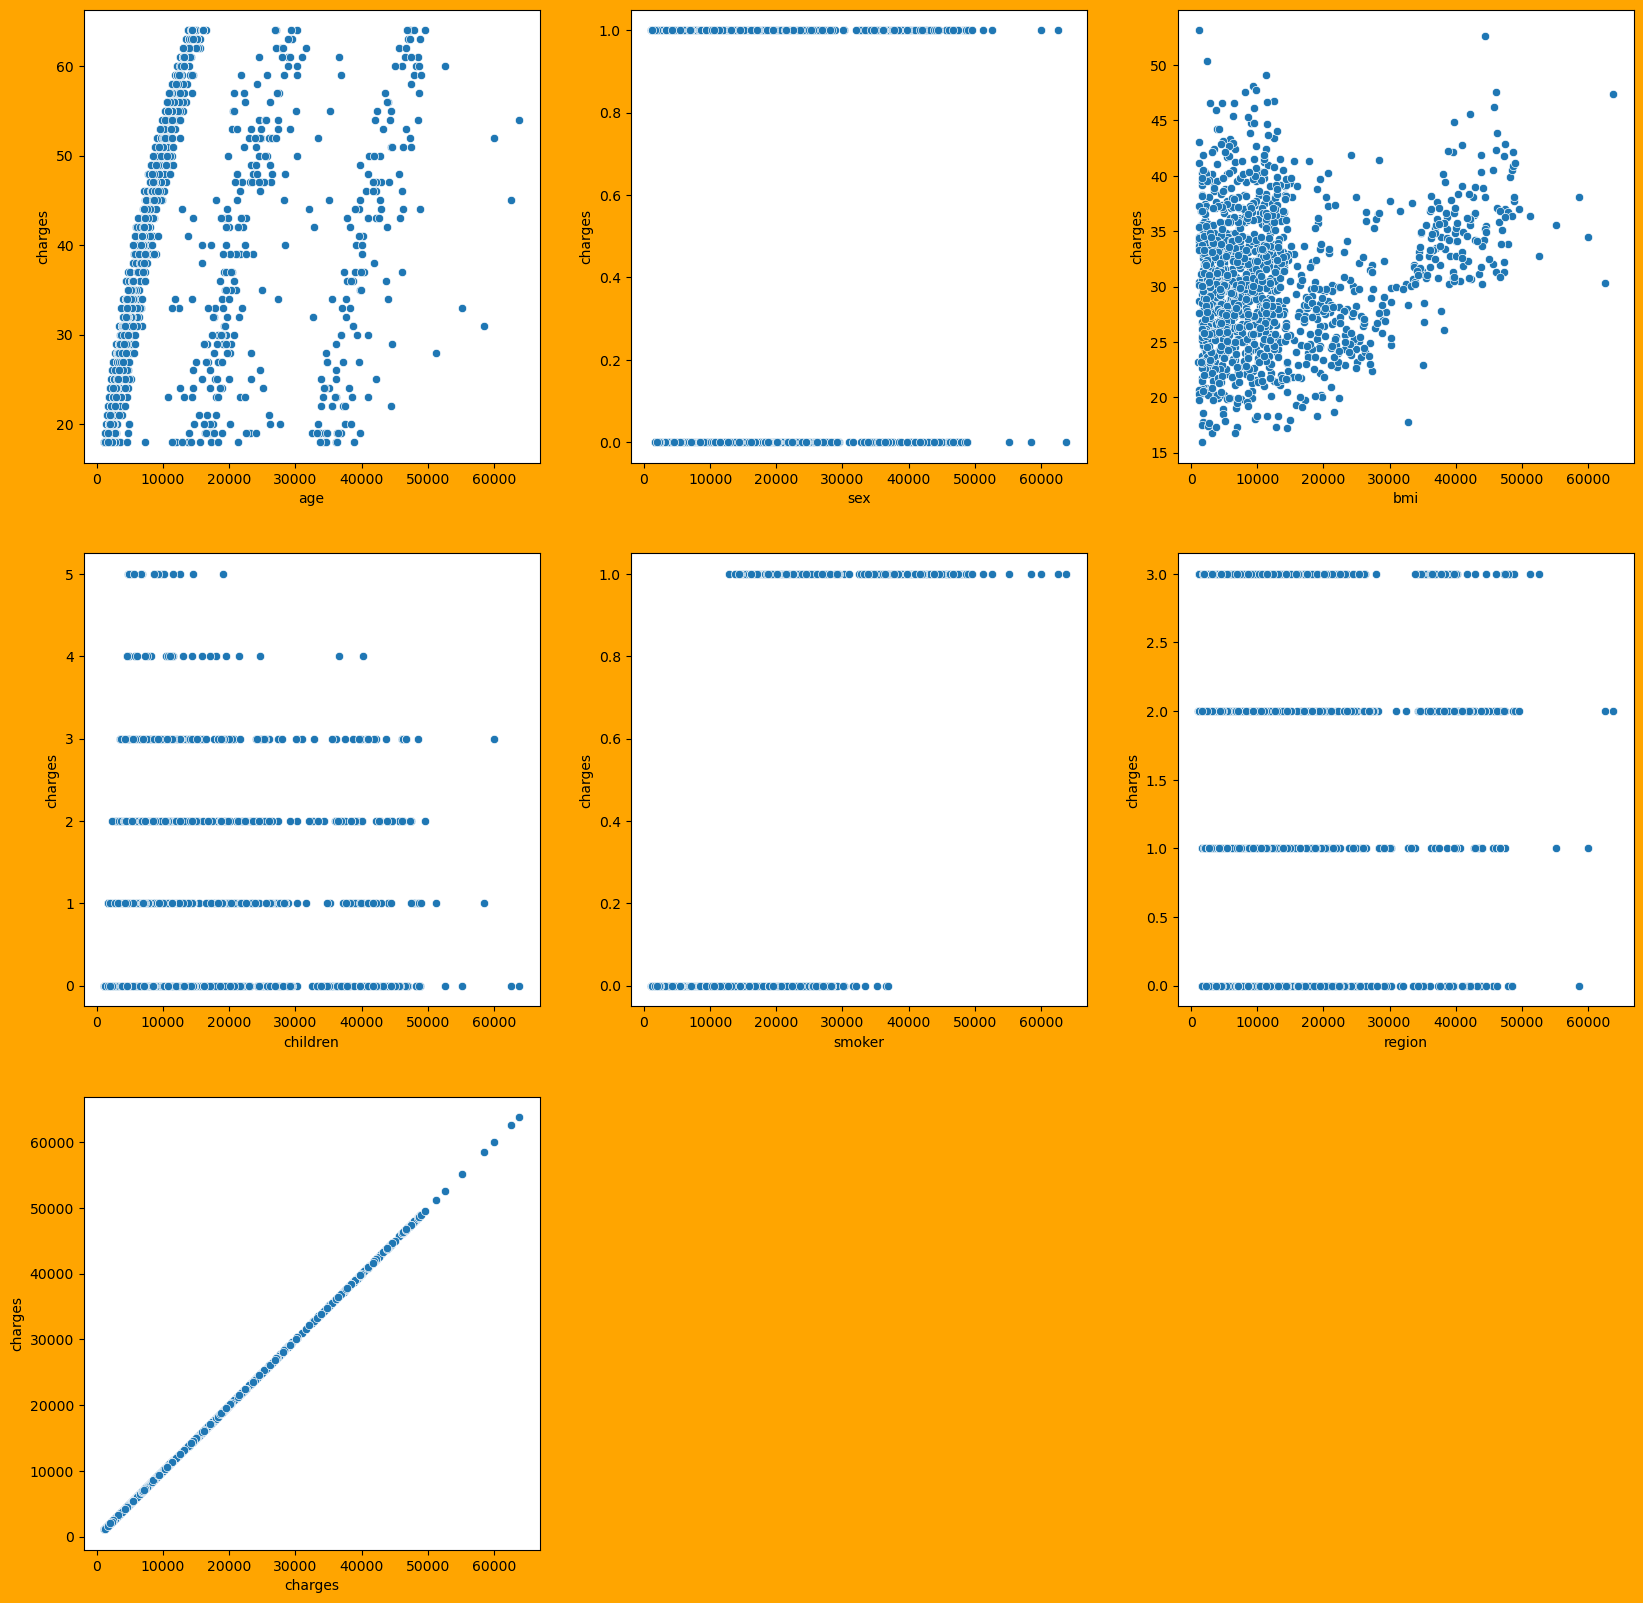

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20), facecolor="orange")
plots = 1

for i in df.columns:  
    if plots <= 7:
        ax = plt.subplot(3, 3, plots)
        sns.scatterplot(y=df[i], x=df['charges'])
        plt.xlabel(i)
        plt.ylabel('charges')
        plots += 1

plt.show()


<Axes: >

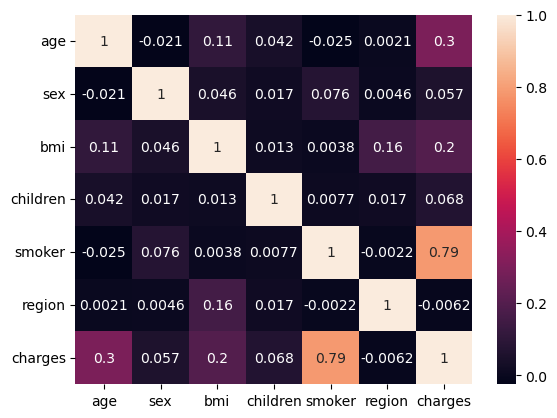

In [42]:
sns.heatmap(df.corr(), annot =True)

In [43]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


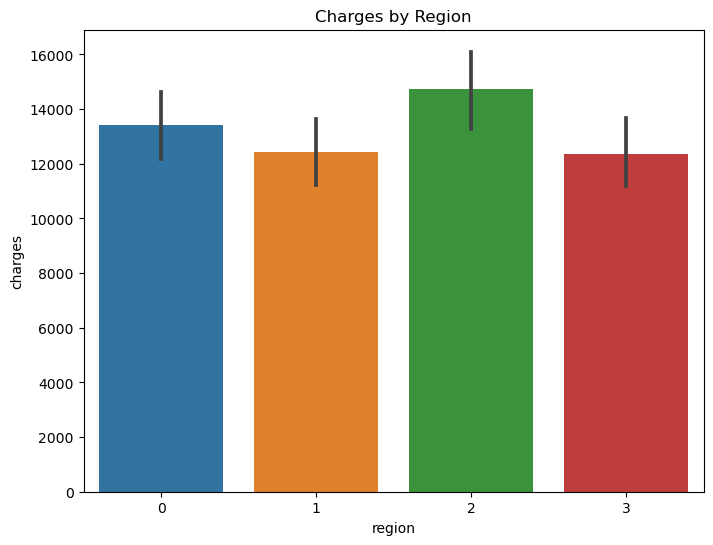

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(x="region", y="charges", data=df)
plt.title("Charges by Region")
plt.show()


* from this oberved that column 'region' shows the very low and negative colrelation that is -0.006208

* but i dont drop that column because the medical cost differ from region to region

splitting the features and label>>>>>>

In [45]:
x= df.drop(['charges'], axis = 1)
y = df['charges']

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [48]:
A = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.30, random_state=i)

    lr = LinearRegression()
    lr.fit(x_train, y_train)

    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)

    if acc > A:
        A = acc
        maxRS = i

print("Best accuracy is ", A, "at random_state", maxRS)


Best accuracy is  0.8041576323426198 at random_state 112


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_sc,y , test_size = 0.25, random_state = 112)

regressor = [     LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),
             AdaBoostRegressor(),GradientBoostingRegressor(),SVR(),KNeighborsRegressor()]

function to find the train and test result

In [51]:
def metric_score(rg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_score = rg.predict(x_train)
        result_type = "train"
    else:
        y_score = rg.predict(x_test)
        result_type = "test"

    mse = mean_squared_error(y_train if train else y_test, y_score)
    r2 = r2_score(y_train if train else y_test, y_score) * 100
    
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} R2 score: {r2:.2f}%')
    print(f'{result_type}  MSE : {mse:.4f}')


In [53]:
for rg in regressor:
    print(f'\n================== {rg.__class__.__name__} ==================')
    rg.fit(x_train, y_train)
    metric_score(rg, x_train, x_test, y_train, y_test, train=True)
    metric_score(rg, x_train, x_test, y_train, y_test, train=False)
    

    


================== LinearRegression ==================

 ============ train result ==========
train R2 score: 73.81%
train  MSE : 38626709.6277

 ============ test result ==========
test R2 score: 78.62%
test  MSE : 30684439.1457

================== DecisionTreeRegressor ==================

 ============ train result ==========
train R2 score: 99.88%
train  MSE : 182648.1711

 ============ test result ==========
test R2 score: 77.83%
test  MSE : 31826233.9899

================== RandomForestRegressor ==================

 ============ train result ==========
train R2 score: 97.31%
train  MSE : 3960022.8717

 ============ test result ==========
test R2 score: 88.77%
test  MSE : 16123683.3697

================== AdaBoostRegressor ==================

 ============ train result ==========
train R2 score: 80.82%
train  MSE : 28288531.9527

 ============ test result ==========
test R2 score: 84.46%
test  MSE : 22308147.4188

================== GradientBoostingRegressor ==================

 =

from this observed that GradientBoost Regressor perfoms well 

In [54]:
for rg in regressor:
    cv = cross_val_score(rg, x_sc, y, cv = 5)
    print('===========',rg, '==============')
    print('cv mean' ,cv.mean())
    a = rg.predict(x_test)
    print('diff between r2 score and cv score', (r2_score(y_test, a ) - cv.mean() ))

=========== LinearRegression() ==============
cv mean 0.7472559473580954
diff between r2 score and cv score 0.03896845632368395
=========== DecisionTreeRegressor() ==============
cv mean 0.7120073775675909
diff between r2 score and cv score 0.06626224901902833
=========== RandomForestRegressor() ==============
cv mean 0.836711443642445
diff between r2 score and cv score 0.05095637355856497
=========== AdaBoostRegressor() ==============
cv mean 0.8289377412346617
diff between r2 score and cv score 0.015643497660964623
=========== GradientBoostingRegressor() ==============
cv mean 0.8537961536272538
diff between r2 score and cv score 0.059273017831539265
=========== SVR() ==============
cv mean -0.09954763482596682
diff between r2 score and cv score 0.027987406352083383
=========== KNeighborsRegressor() ==============
cv mean 0.8062322958732286
diff between r2 score and cv score 0.04147115683003755


as comparing the R2 score, MSE score and diff between the r2 and cv score, i found that GradientBoostingRegressor is the best module to continue

hyper para meter tuning with Gradient Boosting Regressor

In [55]:
good_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]}

In [56]:
rfc = GradientBoostingRegressor()
gcv = GridSearchCV(estimator=rfc, param_grid= good_grid, cv=5, n_jobs=-1)

In [57]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [58]:
print("Best Parameters:", gcv.best_params_)
print("Best Accuracy:", gcv.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.8364789721058354


In [59]:
final = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50, random_state=42)

final.fit(x_train, y_train)

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=3,
                          n_estimators=50, random_state=42)

In [60]:
pred1 = final.predict(x_test)
acc = r2_score(y_test, pred1)
print(acc*100)

91.64385410291423


In [61]:
import joblib
joblib.dump(final, "medical_cost.pkl" )

['medical_cost.pkl']

In [62]:
model  = joblib.load("medical_cost.pkl")
prd = model.predict(x_test)
prd

array([11888.75687602,  8671.8259291 , 34837.10766353, 24370.1084675 ,
       24209.26696024,  8593.84391061,  8478.74184004, 21139.69186717,
        6341.69740088,  4533.12862203,  9822.61915272, 13944.72880131,
       11966.27680679, 17312.35430276, 13528.1906798 ,  3421.90000514,
       11217.891642  , 12749.30479977, 13938.40656239, 13509.28581764,
       40343.97387978, 12127.90615675,  3602.91334656, 47619.41956101,
        3697.70678566,  9720.53614125,  4806.79041619,  6498.13042855,
        5064.89012137,  7195.25787694, 14338.14251485, 12055.6667123 ,
       13947.4077119 ,  7610.7514115 ,  6239.84751609, 42600.46684157,
       12420.00541207,  6065.99425048, 34457.38151257,  7790.3367487 ,
       14322.50611356,  7284.607217  , 43719.20200143,  7405.57845532,
       13828.39771112, 16845.8334028 , 10645.98617424,  9867.66444982,
        6758.819327  , 11652.77203737,  1252.37680875,  8312.9342244 ,
       13887.93320347, 14159.05358782,  5588.35304961, 13349.50436506,
      

In [63]:
ac = r2_score(y_test, prd)
ac * 100

91.64385410291423